### Linear prediction

**Notebook putting the excellent Machine lectures of Nando de Freitas in code/(LA)tex(t). **
This is the first dealing with LM, Least Squares Estimate and matrices

- linear models can be approximat a lot of real processes 
- Linear regression often appears as a module of larger systems.
- Linear problems can be solved analytically.
- Linear prediction provides an introduction to many of the core concepts of machine learning.

Lecture slides can be found at:
http://www.cs.ubc.ca/~nando/540-2013/lectures.html

https://davidhamann.de/2017/06/12/latex-cheat-sheet/
http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import numpy as np

In 2D a LM is essentially $\hat{y} = {\theta}_{1} + X_{i}.{\theta}_{2}$ where ${\theta}_{1}$ is the intercept and ${\theta}_{_2}$ is the slope.

J is the objective/cost function and the best parameters are found by minimizing J 

$J({\theta}) = \sum_{i=1}^n (Y_{i} - {\theta}_{1} - X_{i}.{\theta}_{2})^2$

In [28]:
# let' s plot some random values and fit a line
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 4 * x - 5 + rng.randn(50)

Model slope = 4.027208810360695 and intercept: -4.998577085553199


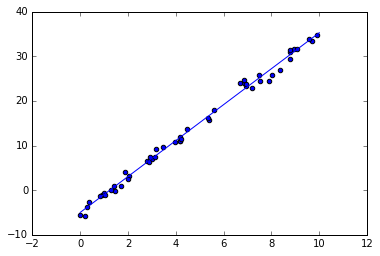

In [29]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(x[:, np.newaxis], y)   # x[:, np.newaxis].shape = (50, 1) instead of (50,)

xfit = np.linspace(0, 10, 1000)
yfit = lm.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
print ('Model slope = {} and intercept: {}'.format(lm.coef_[0], lm.intercept_))

We are trying to to minimize the quadratic distance between **y** and **$\hat{y}$** (minimizing the sum of errors). The $\xi$ between the fitted line and the traning points are like springs that stabilize at a minimum energy configuration. Fitting a model will always produce errors and dealing with ML is dealing with uncertainty and the quantification of it.

So writing $\hat{y} = 1 * {\theta}_{1} + X_{i}.{\theta}_{2}$ can also be written down in a tight **matrix notation**: easier to code in Python and to manipulate with algorithms. First trick is to put the first input $x_{i} = 1$ so that the ${\theta}_{1}$ corresponds to the intercept of the line. ${\theta}_{1}$ then is known as the bias or offset. 

Matrix form of $\hat{y} = X {\theta} : $

$\begin{pmatrix}
\hat{y}_{1} & \vdots & \hat{y}_{n} \\
\end{pmatrix}$ = 
$\left[ \begin{array}{cccc}
1 & x_{12} & \ldots & x_{1D} \\
1 & x_{22} & \ldots & x_{2D} \\
1 & x_{32} & \ldots & x_{ND} \\ \end{array} \right]$
$\left[ \begin{array}{cccc}
{\theta}_{1} & \vdots & {\theta}_{d} \\
\end{array} \right]$

${\theta}$ matrix has 3 degrees of freedom: 1 intercept and 2 slopes in both directions. 

Now suppose ${\theta}$ = [1, 0, .5]T. Then, by multiplying X times ${\theta}$, we would get the following predictions on the training set

$\hat{y} = \left[ \begin{array}{cccc}
2 \\ 22 \\ 16.5 \\ 18.5 \\\end{array} \right]$ 
$ = \left[ \begin{array}{cccc}
1 & 100 & 2 \\ 1 & 50  & 42 \\ 1 & 45  & 31  \\ 1 & 60 & 35 
\end{array} \right]$
$ x \left[ \begin{array}{cccc}
1 \\ 0 \\ .5 \\ \end{array} \right]$ 

** Optimization approach ** 

Our aim is to minimiz the quadratic cost between the ouput labels and model predictions: $\sum_{i=1}^n (Y_{i} - \hat{Y}_{i})^2$. If we would plot the cost function $J({\theta}, {\theta}_{2})$, we have an equation of a quadratic and visualized it looks like a parabola. Let's plot one to illustrate the concept.

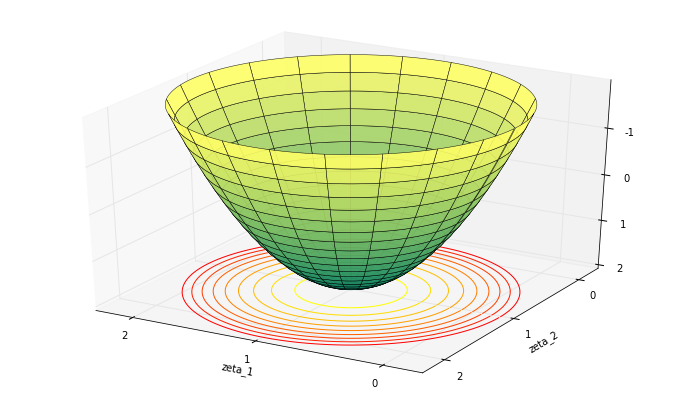

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from math import pi
fig = plt.figure(figsize= [12,7])
ax = fig.add_subplot(111, projection='3d')

r = T = np.arange(0, 2*pi, 0.03)
r, T = np.meshgrid(r, T)
#Parametrise it
X = r*np.cos(T) 
Y = r*np.sin(T)
Z = r**2

plt.locator_params(axis= 'x', nbins=5)
plt.locator_params(axis= 'y', nbins=5)
plt.locator_params(axis= 'z', nbins=5)

ax.plot_surface(X, Y, Z,  alpha=0.9, rstride=10, cstride=10, linewidth=0.5, cmap=cm.summer)
ax.contour(X, Y, Z, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.set_xticklabels([2, 1, 0, -1, -2])
ax.set_yticklabels([2, 1, 0, -1, -2])
ax.set_zticklabels([2, 1, 0, -1, -2])
ax.set_xlabel('zeta_1')
ax.set_ylabel('zeta_2')
plt.show()
# to do add quivers / latex in xlabel throws error/ widen the parabola

The derivative of ${\theta}_{1}$ and of ${\theta}_{2}$ are 2D vectors. The fact from calculus that we need to remember is that the gradient is always perpendicular to the contour plots. **The gradient is the direction steepness/steepest change to the global minumum where $J({\theta})$ gets minimized ** and the LM is perfectly alligned with the points (and where the derivative is 0). 

ex: suppose N = 3, d= 2

$J({\theta}) = (Y_{1} - {\theta}_{1} - X_{1}{\theta}_{2})^2 + (Y_{2} - {\theta}_{1} - X_{2}{\theta}_{2})^2 + (Y_{3} - {\theta}_{1} - X_{3}{\theta}_{2})^2$

$J({\theta}) = \sum_{i=1}^3 (Y_{i} - {\theta}_{1} - X_{i}{\theta}_{2})^2$

If we take the derivative of ${\theta}_{1}$ we would get:  (Derivatives are linear so we take the derivative inside a sum.)

$J({\theta}) = \sum_{i=1}^3 2(Y_{1} - {\theta}_{1} - X_{i}{\theta}_{2}) (-1)$ 
(-1) is the derivative as respect from the term

$J({\theta}) = -2\sum_{i=1}^3 (Y_{1} - {\theta}_{1} - X_{i} {\theta}_{2})$

Once we have this derivative, we can equate it to 0 in order to find the minimum. But after that we have to find the mimimum of ${\theta}_{2}$ as well and if we did not use matrices, we would have to do this painful process for every parameter. 

Fortunately we have **matrices** that also come with some very nice properties. Here is a nice article on https://www.khanacademy.org/math/precalculus/precalc-matrices/properties-of-matrix-addition-and-scalar-multiplication/a/properties-of-matrix-scalar-multiplication

Here we take the derivative of a quadratic form $2A^T{\theta}$ and we can write the cost, compute the derivatives all in a single go with respect to all the vectors of ${\theta}$. 

So in particular the derivative of the cost is just the derivative with respect to the vector ${\theta}$

$\frac{\partial}{\partial\theta} = [Y^TY + {\theta}^TX^TX{\theta} - 2Y^TX{\theta}]$ 

where $Y^TY$ is the quadratic form of $(Y-X{\theta})^T(Y-X{\theta})$

= $0 + 2X^TX{\theta} - 2X^TY$, equating the derivatives to zero:

= $2X^TX{\theta} = 2X^TY$

so 

${\theta} = (X^TX)^{-1}X^TY$ which is the ** LEAST SQUARES ESTIMATE**

So if you massage your data into the matrix X and vector y, computing ${\theta}$ is jst doing a matrix conversion (multiplication of matrices), then having a new x-value x the ${\theta}$, gives you the prediction.

It illustrates an important concept: that you can think of learning as a concept of optimization, where the cost function is a function of the data, of some parameters thta can be adjusted until you arrive at the bottom of he cost function where the derivative is 0

$\mathbf{W} \in \mathbb{R}^{D\times K}$

**Matrix multiplication**

Implement a matrix as nested list: treat each element as a row of the matrix.

In [94]:
# 3x3 matrix
X = [[12,7,3],
     [4 ,5,6],
     [7 ,8,9]]

# 3x4 matrix
Y = [[5,8,1,2],
     [6,7,3,0],
     [4,5,9,1]]

# multiply 2 matrices with list comprehension
matrix_multiplied = [[sum(a*b for a,b in zip(X_row,Y_col)) for Y_col in zip(*Y)] for X_row in X]

for row in matrix_multiplied:
    print(row)

[114, 160, 60, 27]
[74, 97, 73, 14]
[119, 157, 112, 23]


In [89]:
# unpack matrix Y column-wise
list(zip(*Y))

[(5, 6, 4), (8, 7, 5), (1, 3, 9), (2, 0, 1)]

** Transposing a matrix **

In [100]:
X = [[12,7],
     [4 ,5],
     [3 ,8]]

matrix_transposed = [[X[j][i] for j in range(len(X))] for i in range(len(X[0]))]

for row in matrix_transposed:
    print(row)

[12, 4, 3]
[7, 5, 8]


** Adding 2 matrices **

In [85]:
X = [[12,7,3],
     [4 ,5,6],
     [7 ,8,9]]

Y = [[5,8,1],
     [6,7,3],
     [4,5,9]]

matrix_addition = [[X[i][j] + Y[i][j] for j in range(len(X[0]))] for i in range(len(X))]

for row in matrix_addition:
    print (row)